In [55]:
#Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Scenario 1 ")
print("Gowtham S - 24BAD028 ")


Scenario 1 
Gowtham S - 24BAD028 


In [56]:
#Load Dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

df = df.iloc[:, :2]
df.columns = ['label', 'message']

print("Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)

Dataset Loaded Successfully
Dataset Shape: (5572, 2)


In [57]:
#Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned'] = df['message'].apply(clean_text)

In [58]:
#Convert Text to TF-IDF Features
vectorizer = CountVectorizer(
    max_features=3000,   
    ngram_range=(1,1)   
)
X = vectorizer.fit_transform(df['cleaned'])


#Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

In [59]:
#Train-Test Split


X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(
    X, y, df, test_size=0.2, random_state=42
)

#Train Multinomial Naïve Bayes
model = MultinomialNB(alpha=2.0)  
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

In [60]:
#Evaluation Metrics
print("\nModel Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Model Performance:
Accuracy : 0.97847533632287
Precision: 0.95
Recall   : 0.8866666666666667
F1 Score : 0.9172413793103448


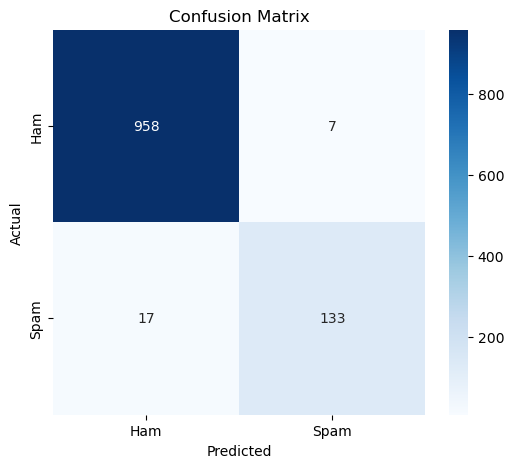

In [61]:
#Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [62]:
#Misclassified Messages

df_test = df_test.copy()
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

print("\nSample Misclassified Messages:")
print(misclassified[['message','Actual','Predicted']].head())


Sample Misclassified Messages:
                                                message  Actual  Predicted
3245  Funny fact Nobody teaches volcanoes 2 erupt, t...       0          1
683   Hi I'm sue. I am 20 years old and work as a la...       1          0
4700                             I liked the new mobile       0          1
3979                                 ringtoneking 84484       1          0
1505  Total video converter free download type this ...       0          1



Top Words Influencing Spam:
['is' 'now' 'or' 'the' 'for' 'free' 'your' 'you' 'call' 'to']


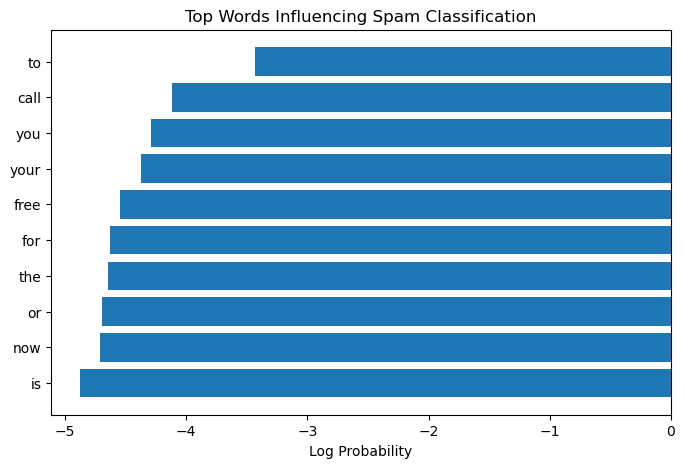

In [63]:
#Top Words Influencing Spam

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]

top_indices = np.argsort(spam_probs)[-10:]
top_words = feature_names[top_indices]

print("\nTop Words Influencing Spam:")
print(top_words)

plt.figure(figsize=(8,5))
plt.barh(top_words, spam_probs[top_indices])
plt.title("Top Words Influencing Spam Classification")
plt.xlabel("Log Probability")
plt.show()

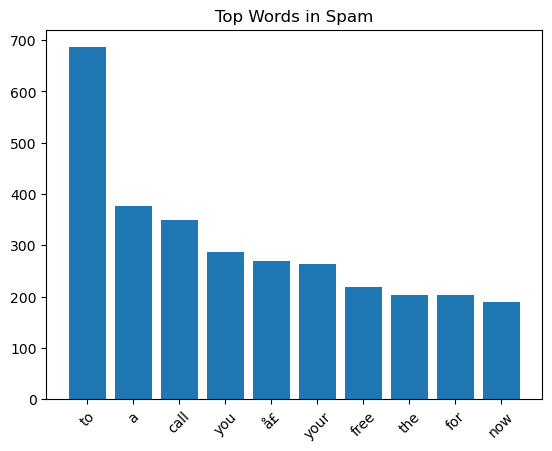

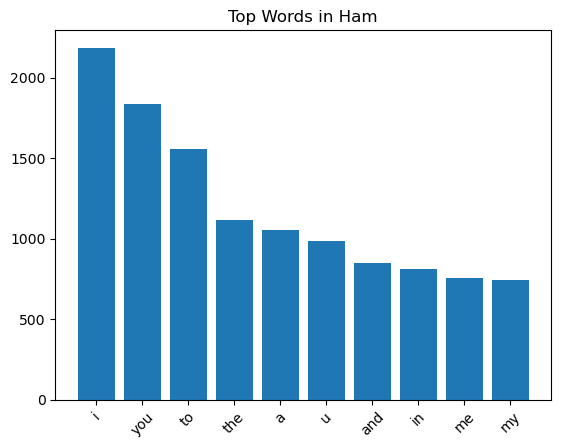

In [64]:
#Word Frequency Comparison
from collections import Counter

spam_text = " ".join(df[df['label']=='spam']['cleaned'])
ham_text = " ".join(df[df['label']=='ham']['cleaned'])

spam_common = Counter(spam_text.split()).most_common(10)
ham_common = Counter(ham_text.split()).most_common(10)

spam_words, spam_counts = zip(*spam_common)
ham_words, ham_counts = zip(*ham_common)

plt.figure()
plt.bar(spam_words, spam_counts)
plt.xticks(rotation=45)
plt.title("Top Words in Spam")
plt.show()

plt.figure()
plt.bar(ham_words, ham_counts)
plt.xticks(rotation=45)
plt.title("Top Words in Ham")
plt.show()

In [65]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Scenario 2 ")
print("Gowtham S - 24BAD028 ")

Scenario 2 
Gowtham S - 24BAD028 


In [66]:
#Load Iris Dataset
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target
feature_names = iris.feature_names[:2]
class_names = iris.target_names

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=7
)

In [67]:
# Train Gaussian Naïve Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

# Evaluation Metrics
print("Gaussian Naïve Bayes Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

Gaussian Naïve Bayes Performance
Accuracy : 0.7166666666666667
Precision: 0.7236363636363637
Recall   : 0.7166666666666667
F1 Score : 0.7193353632378022


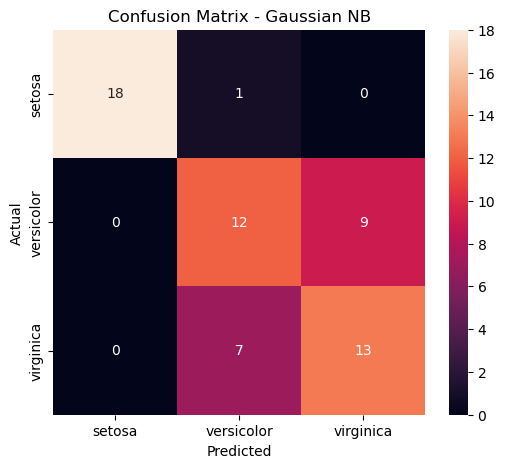

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian NB")
plt.show()


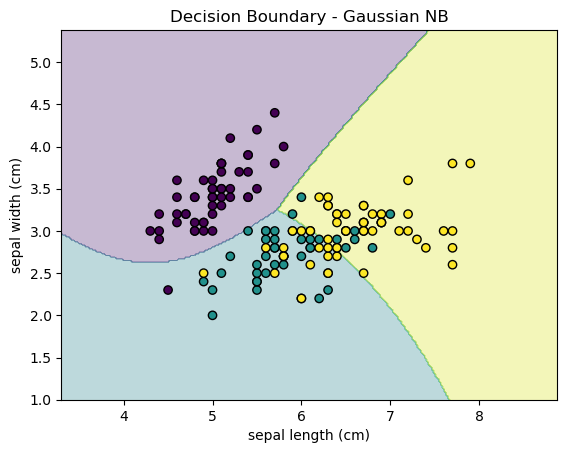

In [69]:
# Decision Boundary Plot

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Boundary - Gaussian NB")
plt.show()

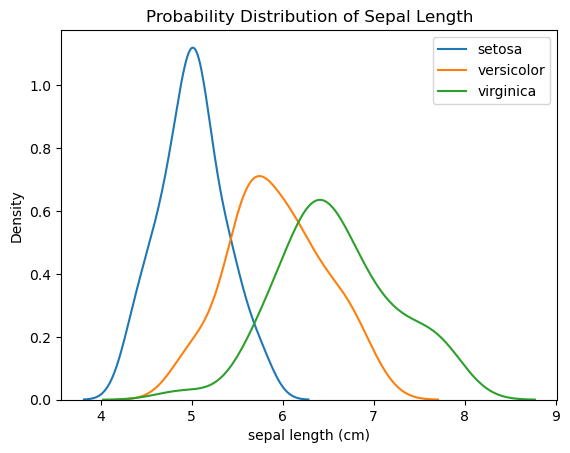

In [70]:
# Probability Distribution Plot

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

for i in range(3):
    sns.kdeplot(df[df['species']==i][feature_names[0]], label=class_names[i])

plt.title("Probability Distribution of Sepal Length")
plt.legend()
plt.show()

In [71]:
# Logistic Regression Comparison

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_log, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_log, average='weighted'))


Logistic Regression Performance
Accuracy : 0.7333333333333333
Precision: 0.7406178489702516
Recall   : 0.7333333333333333
F1 Score : 0.7351623716739996
